In [7]:
RESOLUTION = (1920,1440,3)

def captureImage(fname):
    img = cv2.imread(fname)
    if img.shape[:2] != RESOLUTION[:2]:
        img = cv2.resize(img,RESOLUTION[:2])
    return img

def drawImage(img):
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.show()

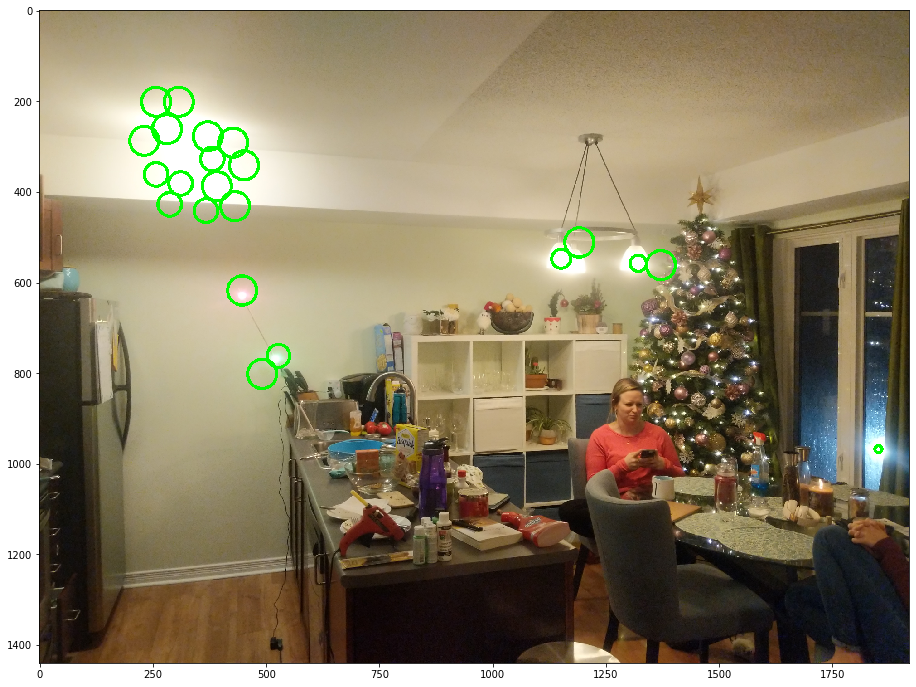

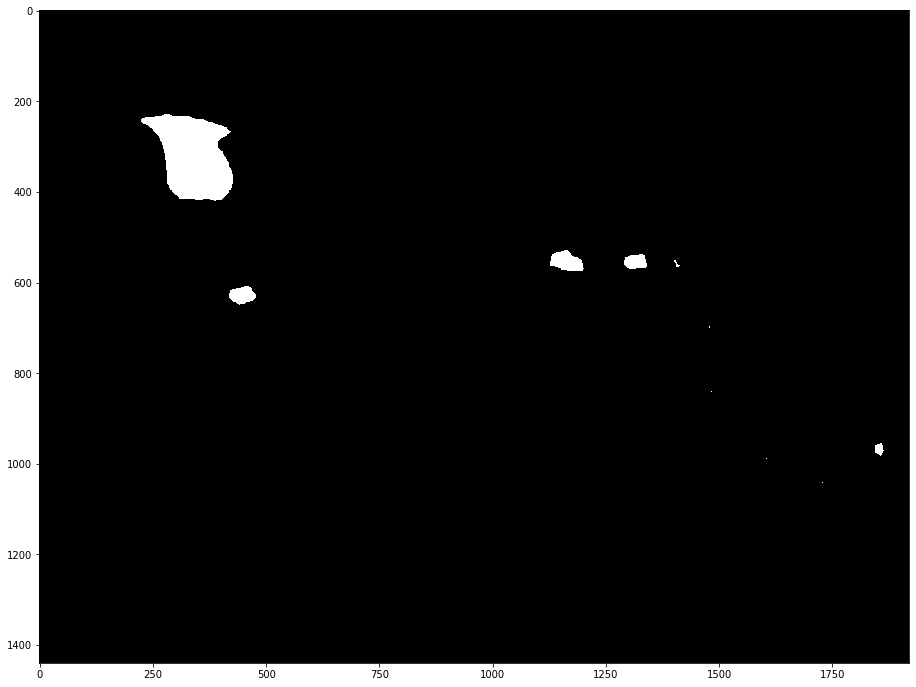

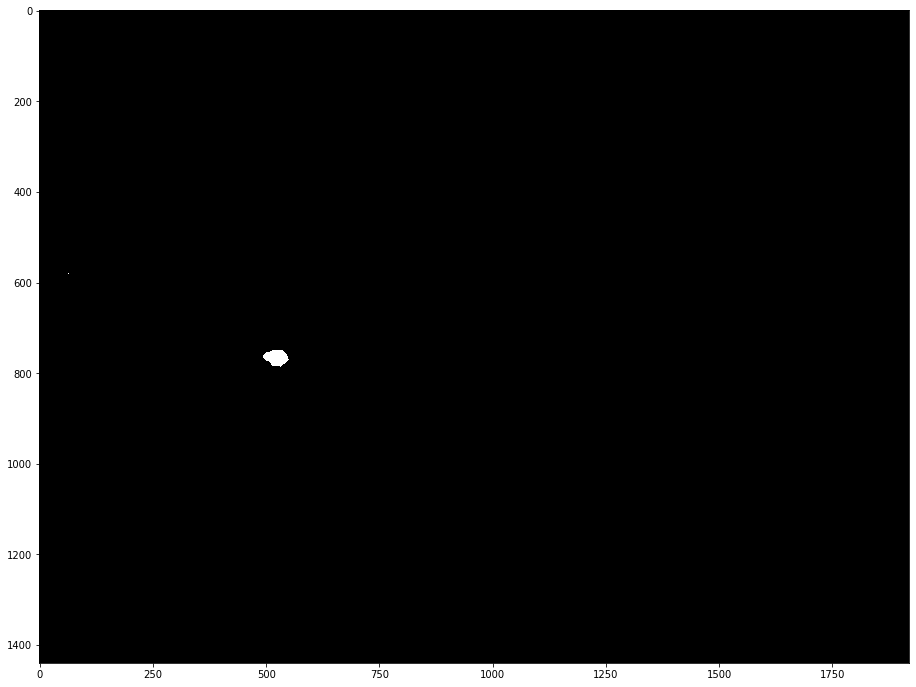

In [131]:
import cv2
import numpy as np
import sys

import matplotlib.pyplot as plt
%matplotlib inline

import importlib
from wand import * #import the module here, so that it can be reloaded.
importlib.reload(wand)

plt.rcParams['figure.figsize'] = [16, 12]
IMAGE_BLUR = 3

img = captureImage('test4.jpg')
# blurred = cv2.GaussianBlur(img, (IMAGE_BLUR, IMAGE_BLUR), 0)
blurred = cv2.GaussianBlur(img, (IMAGE_BLUR, IMAGE_BLUR), 0)


hsv_blurred = cv2.cvtColor(blurred,cv2.COLOR_BGR2HSV)
top_mask = maskTopBall(hsv_blurred)
bottom_mask = maskBottomBall(hsv_blurred)

top_mask = np.dstack((top_mask,top_mask,top_mask))
bottom_mask = np.dstack((bottom_mask,bottom_mask,bottom_mask))

top_circles = findTopCircle(hsv_blurred)
bottom_circles = findBottomCircle(hsv_blurred)
# 
out = img.copy()

drawCircles(out,top_circles)
drawCircles(out,bottom_circles)

drawImage(out)
drawImage(top_mask)
drawImage(bottom_mask)
# drawImage(np.hstack((top_mask,bottom_mask)))

In [78]:
np.max(out)

255

In [ ]:
img = captureImage(os.path.join(BASEPATH,"images","3.jpg"))
blurred = cv2.GaussianBlur(img, (IMAGE_BLUR, IMAGE_BLUR), 0)
lines = findRodLines(blurred)